In [1]:
import pandas as pd
import RAKE
import operator
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
import wordcloud as w
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, make_scorer, classification_report, accuracy_score
import scikitplot as skplt
from sklearn import svm 
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import cosine_similarity 
from sklearn.metrics import roc_curve,roc_auc_score
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/karthikeyans/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
# Download NLTK stopwords
nltk.download('stopwords')

# Get the list of English stopwords
stopwordsList = stopwords.words('english')

df_job = pd.read_csv("jobs.csv")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/karthikeyans/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# Your data cleaning steps...

job = []
cleanJobs = []

for i in df_job["jobtitle"].values:
    jobs = i.lower()
    jobs = jobs.replace("QA","Quality Assurance")
    jobs = jobs.replace("sr","Senior")
    jobs = jobs.replace("jr", "Junior")
    jobs = jobs.replace("qm","Quality Manager")
    job.append(jobs)
    
for j in job:
    text_tokens = word_tokenize(j)
    tokens_without_sw = [f for f in text_tokens if not f in stopwordsList]
    cleanJobs.append(' '.join(tokens_without_sw))

df_job["clean_jobtitle"] = cleanJobs

In [4]:
qty = df_job["clean_jobtitle"].value_counts()[:5].tolist()
label = df_job["clean_jobtitle"].value_counts()[:5].index.tolist()
print(qty)
print("Top 5 Popular Jobs :" + str(label))


[190, 175, 132, 131, 121]
Top 5 Popular Jobs :['java developer', 'project manager', 'business analyst', 'network engineer', 'software engineer']


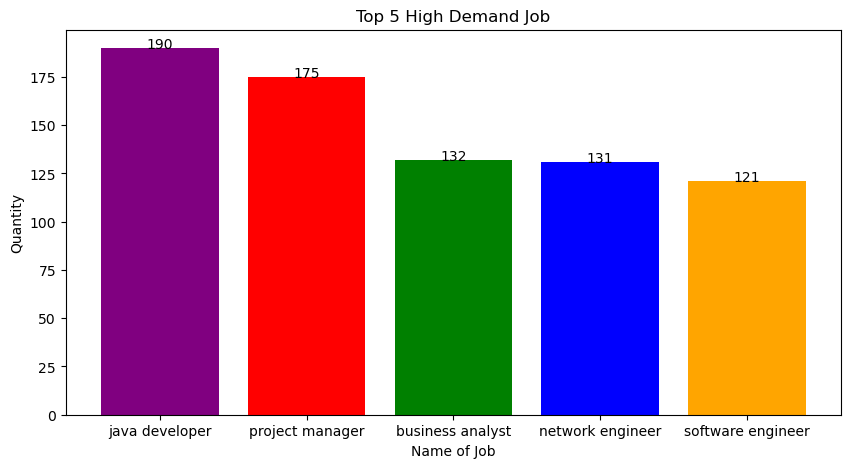

In [5]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = "center")
        
skillslabel = label
jobQty = qty

plt.figure(figsize = (10,5))
plt.bar(skillslabel, jobQty,color=['purple','red','green','blue','orange'])
addlabels(skillslabel,jobQty)
plt.title("Top 5 High Demand Job")
plt.xlabel("Name of Job")
plt.ylabel("Quantity")

plt.show()


In [6]:
skillsTokenized = []
stopwordsSkills = []

with open("stopwords-en.txt", "r", encoding="utf-8") as f:
    for word in f:
        word.lower()
        word = word.split('\n')
        
        stopwordsSkills.append(word[0])
        
for k in df_job["skills"].values:
    k = str(k).split(', ')
    skillstokens_without_sw = [f for f in k if not f.lower() in stopwordsSkills]
    for j in skillstokens_without_sw:
        skillsTokenized.append(j)
        
df = pd.DataFrame({"skills":skillsTokenized})    

In [7]:
qtySkills = df["skills"].value_counts().tolist()
labelSkills = df["skills"].value_counts().index.tolist()
print("Top 5 Skills mostly needed \n" + str(df["skills"].value_counts()[:5]))

Top 5 Skills mostly needed 
Development    1710
Java           1673
SQL            1574
Management     1536
JavaScript     1018
Name: skills, dtype: int64


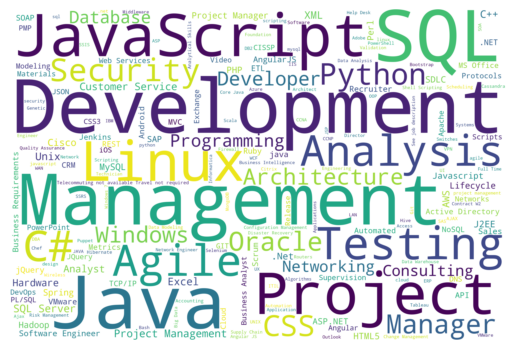

<Figure size 300000x300000 with 0 Axes>

In [8]:
import wordcloud as w
import numpy as np
import matplotlib.pyplot as plt

lskills = labelSkills
frequencies = qtySkills

d = dict(zip(lskills, frequencies))
wordcloud = w.WordCloud(collocations=False,random_state=1,background_color="white",width=3000,height=2000).generate_from_frequencies(d)


plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.figure(figsize=(3000,3000))
plt.show()

In [9]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df_job["clean_jobtitle"].values)
print(X.shape)

analyze = vectorizer.build_analyzer()
#print("job titles", analyze(str(jobtitle)))
#print("Document transform", X.toarray())

#print(vectorizer.get_feature_names())
features = vectorizer.get_feature_names_out()
#indices = zip(*X.nonZero())

#for row,columnmax in indices:
#    print("(%d,%s)%f"%(row, features[column], X[row,column]))


(22000, 4918)


In [10]:
wcss = []
for i in  range(1, 15):
    kmeans = KMeans(n_clusters = i, init = "k-means++", random_state = 42, max_iter=600, n_init=1)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


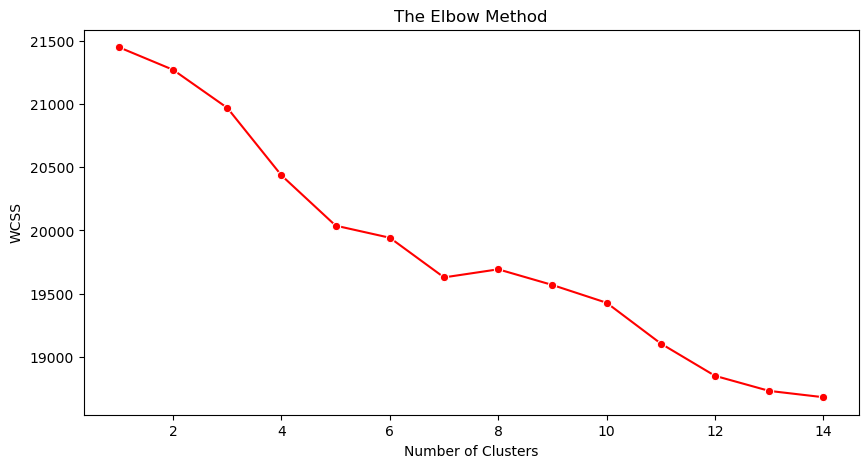

In [11]:
plt.figure(figsize=(10,5))
sns.lineplot(x=range(1, 15), y=wcss,marker="o",color="red")
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [12]:
true_k = 7 
model = KMeans(n_clusters = true_k, init = "k-means++",  max_iter=600, n_init=1,random_state = 42)
pred = model.fit_predict(X)
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()



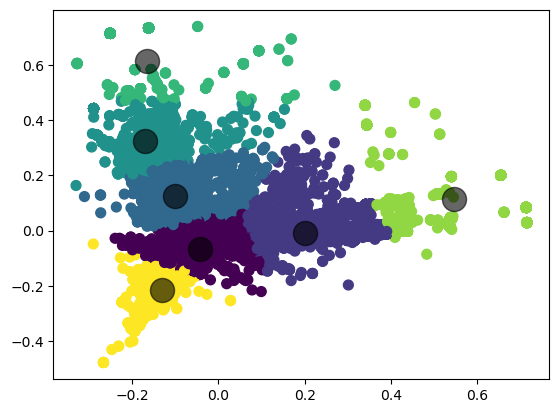

In [13]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

sklearn_pca = PCA(n_components = 2)

Y_sklearn = sklearn_pca.fit_transform(X.toarray())
kmeans = KMeans(n_clusters =7, init = "k-means++",  max_iter=600, n_init=1,random_state = 42)
fitted = kmeans.fit(Y_sklearn)
prediction = kmeans.predict(Y_sklearn)

plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], c=prediction, s=50, cmap="viridis")
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c="black", s=300, alpha=0.6);

In [14]:
from sklearn.metrics import silhouette_score
print("KMeans Scaled Silhouette Score: {}".format(silhouette_score(X, model.labels_, metric="euclidean")))

KMeans Scaled Silhouette Score: 0.035127946181439884


In [15]:
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    for i,r in df.iterrows():
        print("\nCluster {}".format(i))
        print(",".join([labels[t] for t in np.argsort(r)[-n_terms:]]))
get_top_keywords(X, pred, features, 10)        


Cluster 0
desk,production,technician,engineer,specialist,application,technical,analyst,desktop,support

Cluster 1
quality,qa,technical,programmer,security,senior,systems,data,business,analyst

Cluster 2
oracle,specialist,sap,developer,data,technical,lead,consultant,administrator,architect

Cluster 3
java,consultant,devops,administrator,architect,security,systems,network,engineer,senior

Cluster 4
application,front,ui,end,software,web,senior,net,java,developer

Cluster 5
data,development,test,security,senior,devops,systems,network,software,engineer

Cluster 6
business,coordinator,infrastructure,development,product,technical,program,senior,project,manager


In [16]:
label = []
for i in df_job["clean_jobtitle"].values:
    vec = vectorizer.transform([i])
    pred = model.predict(vec)
    if pred == 0:
        label.append("Technical Support Engineer")
    elif pred == 1:
        label.append("Analyst")
    elif pred == 2:
        label.append("Business Solution Consultant")
    elif pred == 3:
        label.append("Cloud Architect/Network")
    elif pred == 4:
        label.append("Developer")
    elif pred == 5:
        label.append("Devops/Software Engineer")
    else: 
        label.append("IT Business Management")   
        
df_job["Label"] = label
df_job.head()

,advertiserurl,company,employmenttype_jobstatus,jobdescription,jobid,joblocation_address,jobtitle,postdate,shift,site_name,skills,uniq_id,clean_jobtitle,Label
0,https://www.dice.com/jobs/detail/AUTOMATION-TE...,"Digital Intelligence Systems, LLC","C2H Corp-To-Corp, C2H Independent, C2H W2, 3 M...",Looking for Selenium engineers...must have sol...,Dice Id : 10110693,"Atlanta, GA",AUTOMATION TEST ENGINEER,1 hour ago,Telecommuting not available|Travel not required,NaN,SEE BELOW,418ff92580b270ef4e7c14f0ddfc36b4,automation test engineer,Devops/Software Engineer
1,https://www.dice.com/jobs/detail/Information-S...,University of Chicago/IT Services,Full Time,The University of Chicago has a rapidly growin...,Dice Id : 10114469,"Chicago, IL",Information Security Engineer,1 week ago,Telecommuting not available|Travel not required,NaN,"linux/unix, network monitoring, incident respo...",8aec88cba08d53da65ab99cf20f6f9d9,information security engineer,Devops/Software Engineer
2,https://www.dice.com/jobs/detail/Business-Solu...,"Galaxy Systems, Inc.",Full Time,"GalaxE.SolutionsEvery day, our solutions affec...",Dice Id : CXGALXYS,"Schaumburg, IL",Business Solutions Architect,2 weeks ago,Telecommuting not available|Travel not required,NaN,"Enterprise Solutions Architecture, business in...",46baa1f69ac07779274bcd90b85d9a72,business solutions architect,Business Solution Consultant
3,https://www.dice.com/jobs/detail/Java-Develope...,TransTech LLC,Full Time,Java DeveloperFull-time/direct-hireBolingbrook...,Dice Id : 10113627,"Bolingbrook, IL","Java Developer (mid level)- FT- GREAT culture,...",2 weeks ago,Telecommuting not available|Travel not required,NaN,Please see job description,3941b2f206ae0f900c4fba4ac0b18719,java developer ( mid level ) - ft- great cultu...,Business Solution Consultant
4,https://www.dice.com/jobs/detail/DevOps-Engine...,Matrix Resources,Full Time,Midtown based high tech firm has an immediate ...,Dice Id : matrixga,"Atlanta, GA",DevOps Engineer,48 minutes ago,Telecommuting not available|Travel not required,NaN,"Configuration Management, Developer, Linux, Ma...",45efa1f6bc65acc32bbbb953a1ed13b7,devops engineer,Devops/Software Engineer


In [17]:
jobSkills = []
for i in df_job["skills"]:
    if isinstance(i, str):  # Check if the value is a string
        jobSkills.append(i.lower())
    else:
        jobSkills.append(str(i).lower())  # Convert non-string values to string and then lower()

Xclass = vectorizer.fit_transform(jobSkills)
X_train, X_test, y_train, y_test = train_test_split(Xclass, label, test_size=0.2, random_state=42)


Text(0, 0.5, 'Accuracy')

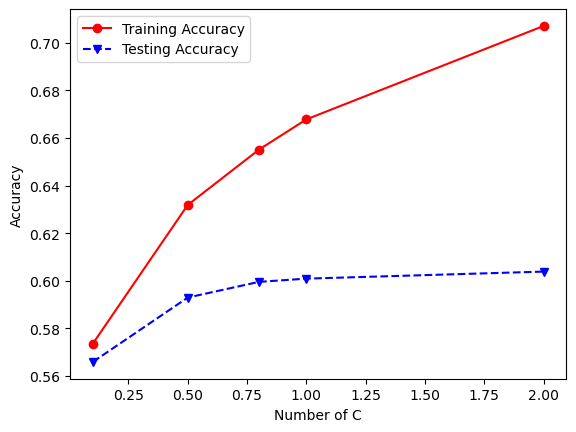

In [18]:
Cparamrange = [0.1,0.5,0.8,1,2]
trainAcc = []
testAcc = []

for i in Cparamrange:
    lrg = LogisticRegression(penalty = "l2", C = i,random_state=42)
    lrg.fit(X_train,y_train)
    lrg_predtrain=lrg.predict(X_train)
    lrg_predtest=lrg.predict(X_test)
    trainacc = accuracy_score(y_train,lrg_predtrain)
    testacc = accuracy_score(y_test,lrg_predtest)
    trainAcc.append(trainacc)
    testAcc.append(testacc)
    
plt.plot(Cparamrange, trainAcc, "ro-", Cparamrange, testAcc, "bv--")    
plt.legend(["Training Accuracy", "Testing Accuracy"])
plt.xlabel("Number of C")
plt.ylabel("Accuracy")

In [19]:
lrg = LogisticRegression(penalty = "l2", C = 0.1,random_state=42)
lrg.fit(X_train,y_train)
lrg_pred=lrg.predict(X_test)
lrg_acc = accuracy_score(y_test,lrg_pred)
print("Accuracy of Logistic Regression:" + str(lrg_acc))
print(classification_report(y_test, lrg_pred))


Accuracy of Logistic Regression:0.5659090909090909
                              precision    recall  f1-score   support

                     Analyst       0.80      0.30      0.44       360
Business Solution Consultant       0.53      0.88      0.66      1907
     Cloud Architect/Network       0.00      0.00      0.00       265
                   Developer       0.62      0.53      0.58       788
    Devops/Software Engineer       0.62      0.24      0.34       605
      IT Business Management       0.78      0.34      0.47       333
  Technical Support Engineer       0.73      0.11      0.20       142

                    accuracy                           0.57      4400
                   macro avg       0.58      0.34      0.38      4400
                weighted avg       0.57      0.57      0.52      4400



<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

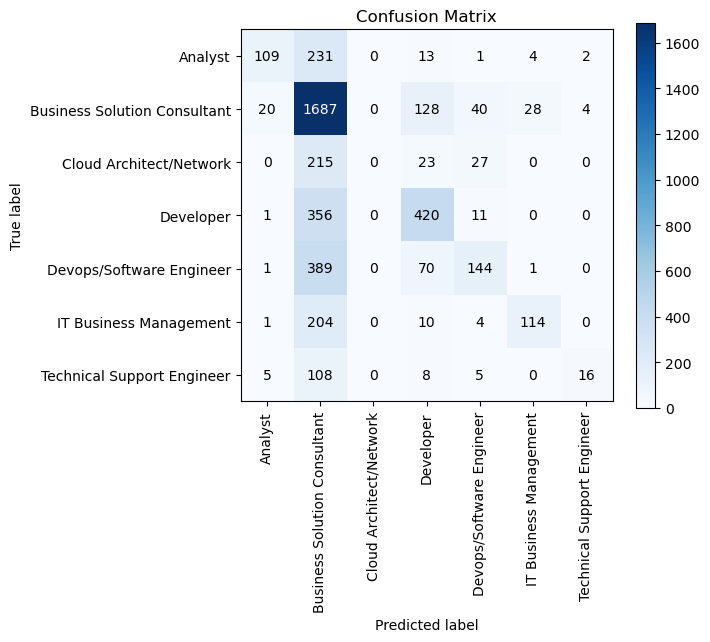

In [20]:
skplt.metrics.plot_confusion_matrix(
    y_test,
    lrg_pred,
    x_tick_rotation=90,
    figsize=(6,5))


Text(0, 0.5, 'Accuracy')

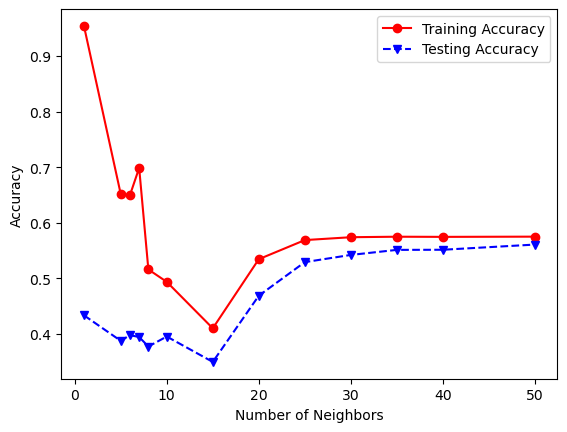

In [21]:
get_ipython().run_line_magic('matplotlib', 'inline')

numNeighbors = [1, 5, 6, 7, 8, 10, 15, 20, 25, 30,35,40,50]
trainAcc = []
testAcc = []

for k in numNeighbors:
    clf1 = KNeighborsClassifier(n_neighbors=k, metric="minkowski", p=2)
    clf1.fit(X_train,y_train)
    Y_pedTrain = clf1.predict(X_train)
    Y_pedTest = clf1.predict(X_test)
    trainAcc.append(accuracy_score(y_train, Y_pedTrain))
    testAcc.append(accuracy_score(y_test, Y_pedTest))
    
plt.plot(numNeighbors, trainAcc, "ro-", numNeighbors, testAcc, "bv--")    
plt.legend(["Training Accuracy", "Testing Accuracy"])
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

In [22]:
knn = KNeighborsClassifier(n_neighbors=50, metric="minkowski", p=2)
knn.fit(X_train, y_train)
knn_pred = clf1.predict(X_test)
knn_acc = accuracy_score(y_test,knn_pred)
print("Accuracy of Knn:" + str(knn_acc))
print(classification_report(y_test, knn_pred))


Accuracy of Knn:0.5609090909090909
                              precision    recall  f1-score   support

                     Analyst       0.78      0.31      0.44       360
Business Solution Consultant       0.58      0.71      0.64      1907
     Cloud Architect/Network       0.42      0.02      0.04       265
                   Developer       0.50      0.79      0.61       788
    Devops/Software Engineer       0.49      0.32      0.39       605
      IT Business Management       0.67      0.46      0.55       333
  Technical Support Engineer       0.66      0.22      0.33       142

                    accuracy                           0.56      4400
                   macro avg       0.58      0.40      0.43      4400
                weighted avg       0.57      0.56      0.53      4400



<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

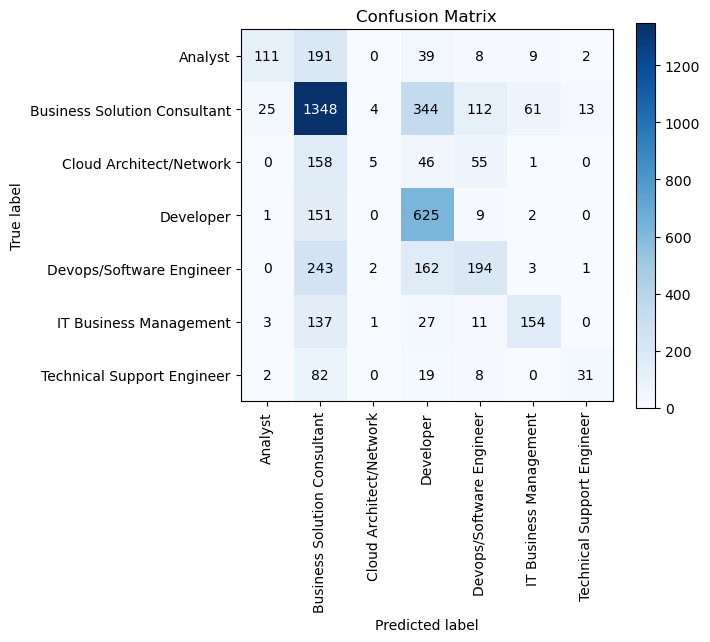

In [23]:
skplt.metrics.plot_confusion_matrix(
    y_test,
    knn_pred,
    x_tick_rotation=90,
    figsize=(6,5))

Text(0, 0.5, 'Accuracy')

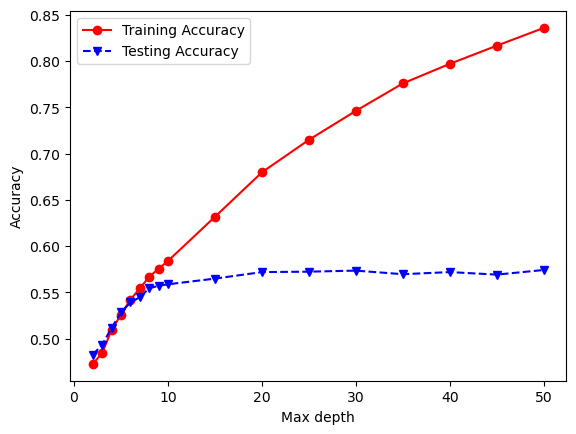

In [24]:
import numpy as np
maxdepths = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]

trainAccuracy = np.zeros(len(maxdepths))
testAccuracy = np.zeros(len(maxdepths))

index = 0 
for depth in maxdepths:
    clf2 = DecisionTreeClassifier(max_depth=depth)
    clf2 = clf2.fit(X_train, y_train)
    Y_predTrain = clf2.predict(X_train)
    Y_predTest = clf2.predict(X_test)
    trainAccuracy[index] = accuracy_score(y_train,Y_predTrain)
    testAccuracy[index] = accuracy_score(y_test,Y_predTest)
    index +=1
    
plt.plot(maxdepths, trainAccuracy, "ro-", maxdepths, testAccuracy, "bv--")    
plt.legend(["Training Accuracy", "Testing Accuracy"])
plt.xlabel("Max depth")
plt.ylabel("Accuracy")   

In [25]:
dt = DecisionTreeClassifier(max_depth=10)
dt2 = dt.fit(X_train, y_train)
dt_pred = dt2.predict(X_test)
dt_acc = accuracy_score(y_test, dt_pred)
print("Accuracy of Decision Tree:" + str(dt_acc))
print(classification_report(y_test, dt_pred))

Accuracy of Decision Tree:0.5595454545454546
                              precision    recall  f1-score   support

                     Analyst       0.71      0.38      0.49       360
Business Solution Consultant       0.54      0.80      0.65      1907
     Cloud Architect/Network       0.48      0.04      0.08       265
                   Developer       0.55      0.56      0.55       788
    Devops/Software Engineer       0.60      0.23      0.34       605
      IT Business Management       0.66      0.48      0.55       333
  Technical Support Engineer       0.71      0.26      0.38       142

                    accuracy                           0.56      4400
                   macro avg       0.61      0.39      0.43      4400
                weighted avg       0.57      0.56      0.52      4400



<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

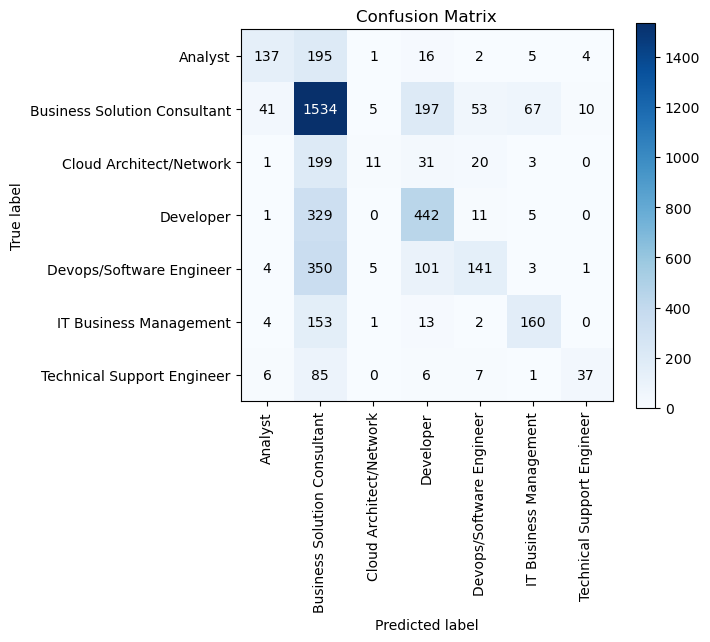

In [26]:
skplt.metrics.plot_confusion_matrix(
    y_test,
    dt_pred,
    x_tick_rotation=90,
    figsize=(6,5))


Text(0, 0.5, 'Accuracy')

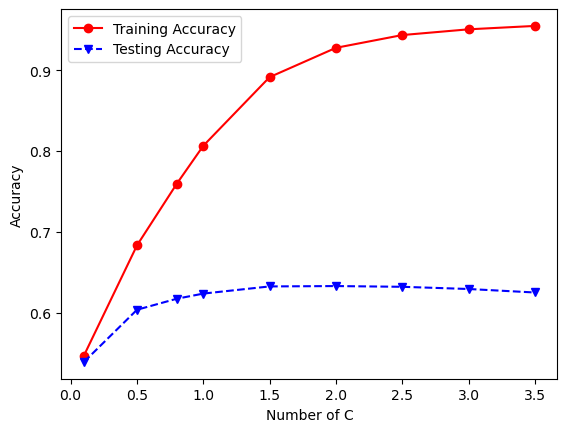

In [27]:
Csvm = [0.1,0.5,0.8,1,1.5,2,2.5,3,3.5]

trainAcc = [] 
testAcc = []


for c in Csvm:
    modelsvm = svm.SVC(C= c, gamma=1, kernel= "rbf")
    svmfit = modelsvm.fit(X_train, y_train)
    Y_predTrain = modelsvm.predict(X_train)
    Y_predTest = modelsvm.predict(X_test)
    trainAcc.append(accuracy_score(y_train,Y_predTrain))
    testAcc.append(accuracy_score(y_test,Y_predTest))
    
    
plt.plot(Csvm, trainAcc, "ro-", Csvm, testAcc, "bv--")    
plt.legend(["Training Accuracy", "Testing Accuracy"])
plt.xlabel("Number of C")
plt.ylabel("Accuracy")     

Accuracy of SVM:0.625
                              precision    recall  f1-score   support

                     Analyst       0.65      0.50      0.56       360
Business Solution Consultant       0.61      0.78      0.69      1907
     Cloud Architect/Network       0.54      0.21      0.30       265
                   Developer       0.64      0.65      0.64       788
    Devops/Software Engineer       0.56      0.44      0.50       605
      IT Business Management       0.77      0.56      0.65       333
  Technical Support Engineer       0.73      0.43      0.54       142

                    accuracy                           0.62      4400
                   macro avg       0.64      0.51      0.55      4400
                weighted avg       0.63      0.62      0.61      4400



<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

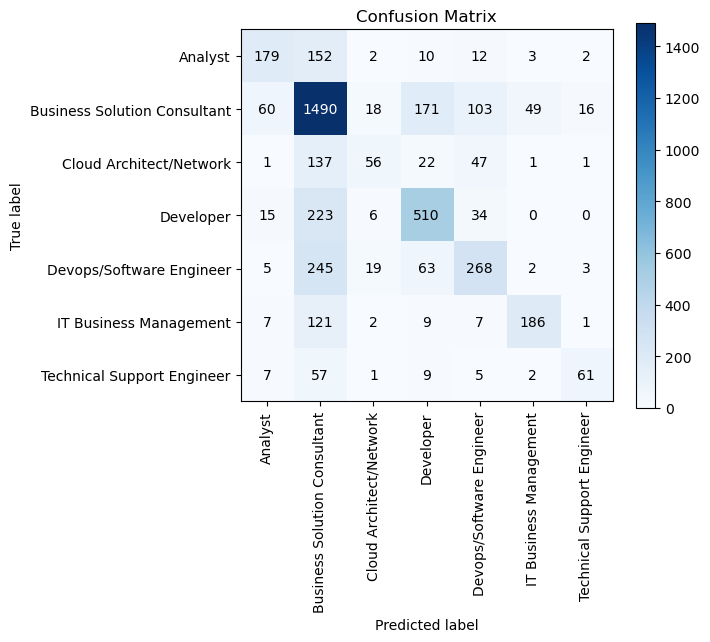

In [28]:
svm = svm.SVC(C= 5, gamma= 1, kernel= "rbf", probability=True)
svmfit = svm.fit(X_train, y_train)
svm_predictions = svmfit.predict(X_test)
svm_acc = accuracy_score(y_test, svm_predictions)
print("Accuracy of SVM:" + str(svm_acc))
print(classification_report(y_test, svm_predictions))


# In[39]:


skplt.metrics.plot_confusion_matrix(
    y_test,
    svm_predictions,
    x_tick_rotation=90,
    figsize=(6,5))

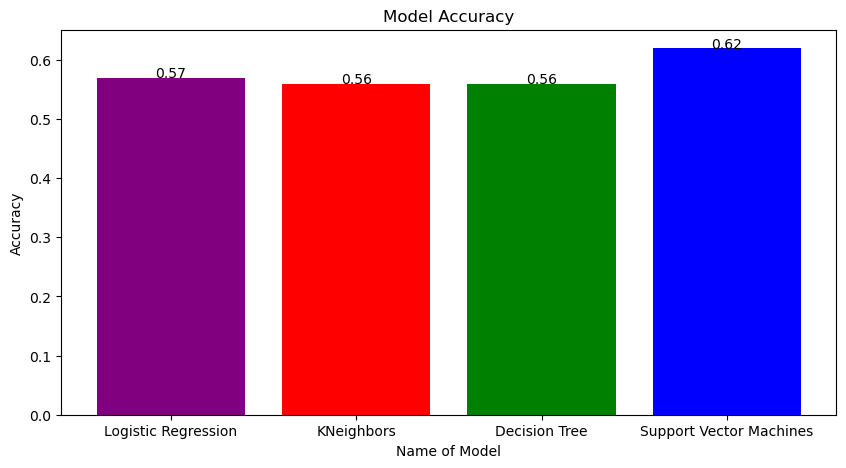

In [29]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = "center")
        
labels = ("Logistic Regression", "KNeighbors", "Decision Tree", "Support Vector Machines")   
modelsAccuracy = [round(lrg_acc, 2),round(knn_acc, 2),round(dt_acc, 2),round(svm_acc, 2)]

plt.figure(figsize = (10,5))
plt.bar(labels, modelsAccuracy,color=["purple","red","green","blue"])
addlabels(labels, modelsAccuracy)
plt.title("Model Accuracy")
plt.xlabel("Name of Model")
plt.ylabel("Accuracy")
plt.show()


In [30]:
lrg_prob = lrg.predict_proba(X_test)[::,1]
knn_prob = knn.predict_proba(X_test)[::,1]
dt_prob = dt.predict_proba(X_test)[::,1]
svm_prob = svm.predict_proba(X_test)[::,1]


fprlrg, tprlrg, threshlrg = roc_curve (y_test, lrg_prob,pos_label="Developer")
fprknn, tprknn, threshknn = roc_curve (y_test, knn_prob, pos_label="Developer")
fprdt, tprdt, threshdt = roc_curve(y_test, dt_prob, pos_label="Developer")
fprsvm, tprsvm, threshsvm = roc_curve (y_test, svm_prob, pos_label="Developer")

random_probs = [0 for i in range(len (y_test))]
p_fpr, p_tpr,_ = roc_curve (y_test, random_probs, pos_label="Developer")


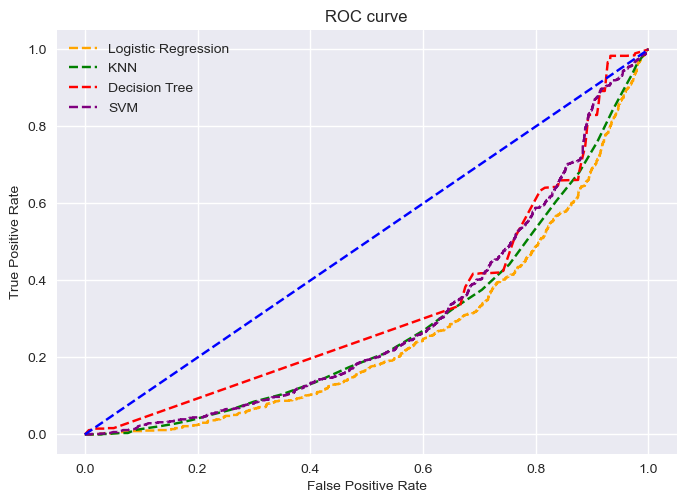

In [31]:
plt.style.use("seaborn")
              
plt.plot(fprlrg, tprlrg, linestyle="--", color= "orange", label= "Logistic Regression") 
plt.plot(fprknn, tprknn, linestyle="--", color= "green", label= "KNN")          
plt.plot(fprdt, tprdt, linestyle="--", color= "red", label= "Decision Tree")
plt.plot(fprsvm, tprsvm, linestyle="--", color= "purple", label= "SVM")
plt.plot(p_fpr, p_tpr, linestyle="--", color= "blue")      
         
plt.title("ROC curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
         
plt.legend(loc="best")
plt.savefig("ROC", dpi=300)
plt.show()         


In [32]:
labelData = df_job[df_job['Label'] == "Technical Support Engineer"]
skillsClass = []

for index, row in labelData.iterrows():
    skills = row['skills']
    
    if isinstance(skills, str):
        skillstokens_without_sw = [f for f in skills.split() if not f.lower() in stopwordsSkills]
        for j in skillstokens_without_sw:
            skillsClass.append(j)
    else:
        skillsClass.append(str(skills).lower())

df_engineer = pd.DataFrame({'skills': skillsClass})

qtySkills = df_engineer["skills"].value_counts().tolist()
labelSkills = df_engineer["skills"].value_counts().index.tolist()


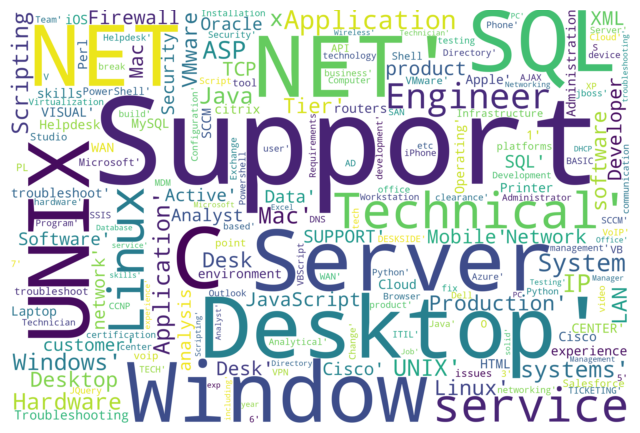

<Figure size 300000x300000 with 0 Axes>

In [33]:
lskills = labelSkills
frequencies = qtySkills

d = dict(zip(lskills, frequencies))
wordcloud = w.WordCloud(collocations=False,random_state=1,background_color="white",width=3000,height=2000).generate(str(d))


plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.figure(figsize=(3000,3000))
plt.show()


In [34]:
labelData = df_job[df_job['Label'] == "Analyst"]
skillsClass = []

for index, row in labelData.iterrows():
    skills = row['skills']
    
    if isinstance(skills, str):
        skillstokens_without_sw = [f for f in skills.split() if not f.lower() in stopwordsSkills]
        for j in skillstokens_without_sw:
            skillsClass.append(j)
    else:
        skillsClass.append(str(skills).lower())

df_engineer = pd.DataFrame({'skills': skillsClass})

qtySkills = df_engineer["skills"].value_counts().tolist()
labelSkills = df_engineer["skills"].value_counts().index.tolist()


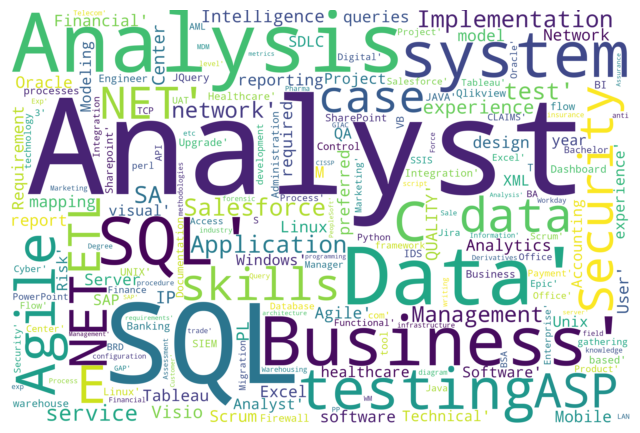

<Figure size 300000x300000 with 0 Axes>

In [35]:
lskills = labelSkills
frequencies = qtySkills

d = dict(zip(lskills, frequencies))
wordcloud = w.WordCloud(collocations=False,random_state=1,background_color="white",width=3000,height=2000).generate(str(d))


plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.figure(figsize=(3000,3000))
plt.show()

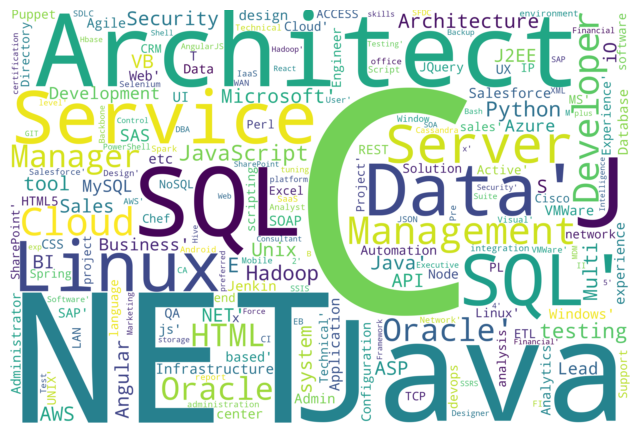

<Figure size 300000x300000 with 0 Axes>

In [36]:
labelData = df_job[df_job['Label'] == "Business Solution Consultant"]
skillsClass = []

for index, row in labelData.iterrows():
    skills = row['skills']
    
    if isinstance(skills, str):
        skillstokens_without_sw = [f for f in skills.split() if not f.lower() in stopwordsSkills]
        for j in skillstokens_without_sw:
            skillsClass.append(j)
    else:
        skillsClass.append(str(skills).lower())

df_engineer = pd.DataFrame({'skills': skillsClass})

qtySkills = df_engineer["skills"].value_counts().tolist()
labelSkills = df_engineer["skills"].value_counts().index.tolist()
lskills = labelSkills
frequencies = qtySkills

d = dict(zip(lskills, frequencies))
wordcloud = w.WordCloud(collocations=False,random_state=1,background_color="white",width=3000,height=2000).generate(str(d))


plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.figure(figsize=(3000,3000))
plt.show()


In [37]:
labelData = df_job[df_job['Label'] == "Cloud Architect/Network"]
skillsClass = []

for index, row in labelData.iterrows():
    skills = row['skills']
    
    if isinstance(skills, str):
        skillstokens_without_sw = [f for f in skills.split() if not f.lower() in stopwordsSkills]
        for j in skillstokens_without_sw:
            skillsClass.append(j)
    else:
        skillsClass.append(str(skills).lower())

df_engineer = pd.DataFrame({'skills': skillsClass})

qtySkills = df_engineer["skills"].value_counts().tolist()
labelSkills = df_engineer["skills"].value_counts().index.tolist()


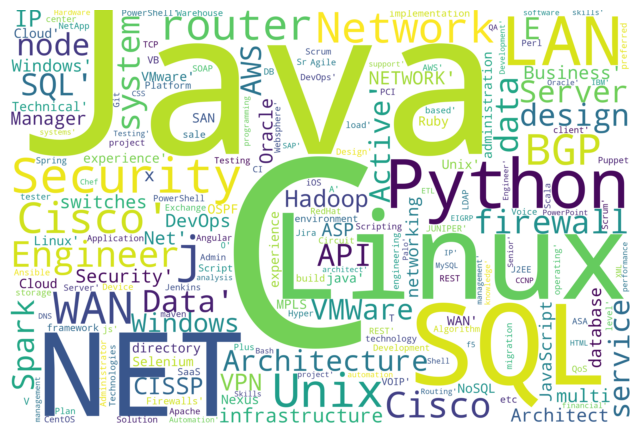

<Figure size 300000x300000 with 0 Axes>

In [38]:
lskills = labelSkills
frequencies = qtySkills

d = dict(zip(lskills, frequencies))
wordcloud = w.WordCloud(collocations=False,random_state=1,background_color="white",width=3000,height=2000).generate(str(d))


plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.figure(figsize=(3000,3000))
plt.show()


In [43]:
labelData = df_job[df_job['Label'] == "Developer"]
skillsClass = []

for index, row in labelData.iterrows():
    skills = row['skills']
    
    if isinstance(skills, str):
        skillstokens_without_sw = [f for f in skills.split() if not f.lower() in stopwordsSkills]
        for j in skillstokens_without_sw:
            skillsClass.append(j)
    else:
        skillsClass.append(str(skills).lower())

df_engineer = pd.DataFrame({'skills': skillsClass})

qtySkills = df_engineer["skills"].value_counts().tolist()
labelSkills = df_engineer["skills"].value_counts().index.tolist()



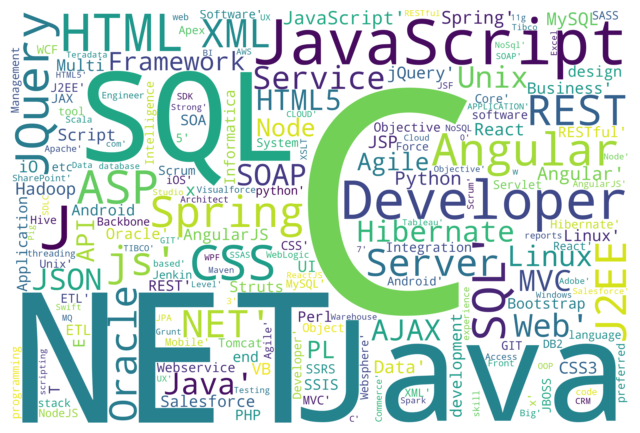

<Figure size 300000x300000 with 0 Axes>

In [44]:
lskills = labelSkills
frequencies = qtySkills

d = dict(zip(lskills, frequencies))
wordcloud = w.WordCloud(collocations=False,random_state=1,background_color="white",width=3000,height=2000).generate(str(d))


plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.figure(figsize=(3000,3000))
plt.show()


In [45]:
labelData = df_job[df_job['Label'] == "Devops/Software Engineer"]
skillsClass = []

for index, row in labelData.iterrows():
    skills = row['skills']
    
    if isinstance(skills, str):
        skillstokens_without_sw = [f for f in skills.split() if not f.lower() in stopwordsSkills]
        for j in skillstokens_without_sw:
            skillsClass.append(j)
    else:
        skillsClass.append(str(skills).lower())

df_engineer = pd.DataFrame({'skills': skillsClass})

qtySkills = df_engineer["skills"].value_counts().tolist()
labelSkills = df_engineer["skills"].value_counts().index.tolist()


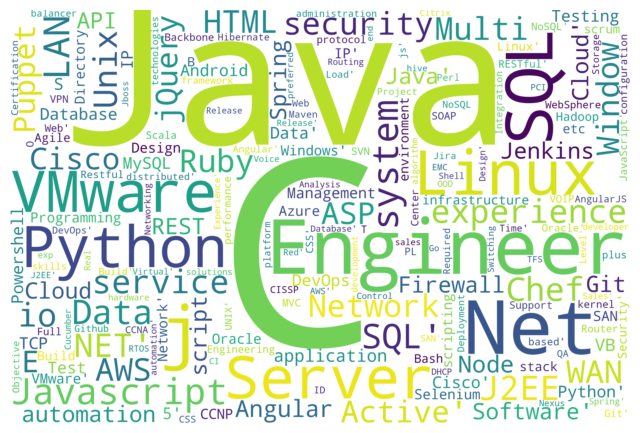

<Figure size 300000x300000 with 0 Axes>

In [46]:
lskills = labelSkills
frequencies = qtySkills

d = dict(zip(lskills, frequencies))
wordcloud = w.WordCloud(collocations=False,random_state=1,background_color="white",width=3000,height=2000).generate(str(d))


plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.figure(figsize=(3000,3000))
plt.show()



In [47]:
labelData = df_job[df_job['Label'] == "IT Business Management"]
skillsClass = []

for index, row in labelData.iterrows():
    skills = row['skills']
    
    if isinstance(skills, str):
        skillstokens_without_sw = [f for f in skills.split() if not f.lower() in stopwordsSkills]
        for j in skillstokens_without_sw:
            skillsClass.append(j)
    else:
        skillsClass.append(str(skills).lower())

df_engineer = pd.DataFrame({'skills': skillsClass})

qtySkills = df_engineer["skills"].value_counts().tolist()
labelSkills = df_engineer["skills"].value_counts().index.tolist()


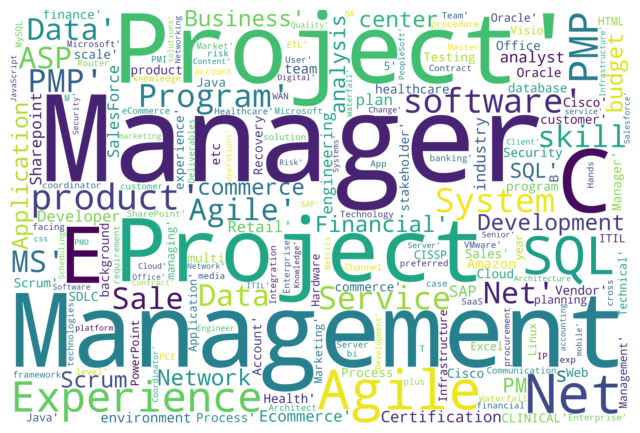

<Figure size 300000x300000 with 0 Axes>

In [48]:
lskills = labelSkills
frequencies = qtySkills

d = dict(zip(lskills, frequencies))
wordcloud = w.WordCloud(collocations=False,random_state=1,background_color="white",width=3000,height=2000).generate(str(d))


plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.figure(figsize=(3000,3000))
plt.show()


In [49]:
userInput = input("Enter your skills:")
pred = vectorizer.transform([userInput.lower()])

output = svm.predict(pred)
print(output [0])


Enter your skills:java,python
Developer


In [50]:
import numpy as np

cos = []
labelData = df_job[df_job['Label'] == output[0]]

for index, row in labelData.iterrows():
    skills = [row['skills']]
    
    # Check for np.nan and replace it with an empty string
    skills = ['' if pd.isna(skill) else skill for skill in skills]

    skillVec = vectorizer.transform(skills)
    cos_lib = cosine_similarity(skillVec, pred)
    cos.append(cos_lib[0][0])

labelData['cosine_similarity'] = cos


In [51]:
top_5 = labelData.sort_values("cosine_similarity", ascending=False)[["advertiserurl","company","employmenttype_jobstatus","jobdescription","joblocation_address","jobtitle","skills","Label","cosine_similarity"]]
top_5.head()



,advertiserurl,company,employmenttype_jobstatus,jobdescription,joblocation_address,jobtitle,skills,Label,cosine_similarity
15170,https://www.dice.com/jobs/detail/Application-D...,"GLOBALPOINT,INC","C2H W2, 6 months","Hi, Please let me Know if anyone is available ...","Pittsburgh , Pa, PA",Application Developer,"JAVA,C++,PYTHON",Developer,1.000000
3353,https://www.dice.com/jobs/detail/Java-Develope...,IntePros Consulting,"Contract Corp-To-Corp, Contract Independent, C...",Codes software applications to adhere to desig...,"Philadelphia, PA",Java Developer,Java and Python,Developer,0.854906
5374,https://www.dice.com/jobs/detail/Python-Develo...,Net2Source Inc.,Full Time,"Net2Source, Inc. is one of the fastest growing...","Houston, TX","Python Developer @ Houston, TX",Python,Developer,0.804234
2854,https://www.dice.com/jobs/detail/C%252B%252B-%...,COESYS Solutions Inc,"Contract Independent, Contract W2",C++ and python DeveloperDescriptionDesign and ...,"Orangeburg, NY",C++ /Python Developer,"C++, Python",Developer,0.804234
18438,https://www.dice.com/jobs/detail/C%252B%252B-D...,United Software Group,"Full Time, Contract Corp-To-Corp, Contract Ind...","Hi,This is Siva from United Software Group Inc...","Redmond, WA",C++ Developer,"C++ , Python",Developer,0.804234


In [52]:
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances

euclidean = []
labelData = df_job[df_job['Label'] == output[0]]

for index, row in labelData.iterrows():
    skills = [row['skills']]
    
    # Check for np.nan and replace it with an empty string
    skills = ['' if pd.isna(skill) else skill for skill in skills]

    skillVec = vectorizer.transform(skills)
    euclidean_dist = euclidean_distances(skillVec, pred)
    euclidean.append(euclidean_dist[0][0])

labelData['euclidean_distance'] = euclidean


In [53]:
top_5 = labelData.sort_values("euclidean_distance", ascending=False)[["advertiserurl","company","employmenttype_jobstatus","jobdescription","joblocation_address","jobtitle","skills","Label","euclidean_distance"]]
top_5.head()



,advertiserurl,company,employmenttype_jobstatus,jobdescription,joblocation_address,jobtitle,skills,Label,euclidean_distance
5027,https://www.dice.com/jobs/detail/Sitecore-Sr.-...,iSymmetry,"Contract Corp-To-Corp, Contract Independent, C...",Sitecore Sr. DeveloperTerm: 1 year contractLoc...,"Seattle, WA",Sitecore Sr. Developer,"Sitecore XP, Microsoft Cloud, Digital Marketin...",Developer,1.414214
7,https://www.dice.com/jobs/detail/Sr.-Web-Appli...,"Bluebeam Software, Inc.","Full Time, Full Time",Bluebeam is looking for talented sr. web devel...,"Chicago, IL",Sr. Web Application Developer (Cloud Team) - C...,".NET , C#, MVC, RESTful web services, HTTP, AW...",Developer,1.414214
12878,https://www.dice.com/jobs/detail/.Net-Develope...,Brandywine Technology,C2H W2,JOB RESPONSIBILITIES: This employee will be r...,"Wilmington, DE",.Net Developer,".Net, ASP.net, SQL, desire to learn Networking...",Developer,1.414214
12791,https://www.dice.com/jobs/detail/MDM-Senior-De...,The Royak Group Inc.,"Full Time, Perm",The Senior Applications Developer provides inp...,"Atlanta, GA",MDM Senior Developer,"IBM Infosphere Master Data Management, IBM Inf...",Developer,1.414214
12814,https://www.dice.com/jobs/detail/Java-Develope...,U.S. Tech Solutions Inc.,"Contract W2, 09 Months",US Tech Solutions is seeking a “Java Developer...,"Davie, FL",Java Developer,"JSE 8 , J2EE 7 , JMS, Spring Integration, REST...",Developer,1.414214


In [54]:
userInput = input("Enter your skills: ")
pred = vectorizer. transform( [userInput. lower ()])
output = svm.predict(pred)
print("You may look into " + output[0] + "jobs")
print("Here is a list of jobs that is under "+ output [0])


cos = []
labelData = df_job[df_job['Label'] == output[0]]

for index, row in labelData.iterrows():
    skills = [row['skills']]
    
    # Check for np.nan and replace it with an empty string
    skills = ['' if pd.isna(skill) else skill for skill in skills]

    skillVec = vectorizer.transform(skills)
    cos_lib = cosine_similarity(skillVec, pred)
    cos.append(cos_lib[0][0])

labelData['cosine_similarity'] = cos



top_5 = labelData.sort_values("cosine_similarity", ascending=False)[["advertiserurl","company","employmenttype_jobstatus","jobdescription","joblocation_address","jobtitle","skills","Label"]]
top_5.head()


Enter your skills: java,php,.et
You may look into Devops/Software Engineerjobs
Here is a list of jobs that is under Devops/Software Engineer


,advertiserurl,company,employmenttype_jobstatus,jobdescription,joblocation_address,jobtitle,skills,Label
18683,https://www.dice.com/jobs/detail/Sr.-Fullstack...,HIRECLOUT,"Contract Corp-To-Corp, Contract W2, 12-18 months",Join an opportunity to work at the intersectio...,"Tarzana, CA",Sr. Fullstack PHP Software Engineer,php,Devops/Software Engineer
1854,https://www.dice.com/jobs/detail/Lead-DevOps-E...,Vistaprint USA Inc.,Full Time,Lead DevSecOps / Rugged EngineerAs part of the...,"Waltham, MA",Lead DevOps Engineer,"Python, Java, C/C++ PHP",Devops/Software Engineer
5377,https://www.dice.com/jobs/detail/Senior-Softwa...,Zulily,Full Time,zulily is a retailer obsessed with bringing ou...,"Seattle, WA","Senior Software Engineer, Customer Care Systems","PHP, JavaScript, HTML",Devops/Software Engineer
12123,https://www.dice.com/jobs/detail/Senior-Softwa...,Mainz Brady Group,"C2H Corp-To-Corp, C2H Independent, C2H W2",Our cutting edge client in San Francisco has a...,"San Francisco, CA",Senior Software Engineer - Tecnical Lead,"PHP, Html, Css",Devops/Software Engineer
14986,https://www.dice.com/jobs/detail/Lead-Backend-...,Skyrocket Ventures,Full Time,Skyrocket Ventures is a recruiting firm for hu...,"San Francisco, CA",Lead Backend Java Software Engineer / Architec...,java spring hibernate architect python php,Devops/Software Engineer
